## CS 5180 Reinforcement Learning and Sequential Decision Making
### Exercise 3: Dynamic Programming

In [1]:
%load_ext autoreload
%autoreload 2
import environment as env
import numpy as np
import algorithms
import matplotlib.pyplot as plt
from matplotlib import cm

## Q5 Implementing dynamic programming algorithms

#### NOTE: The indexing for states in the 5x5 World begins at the top left corner (This is required for printing the policy)

In [2]:
dim = 5
grid = np.zeros([dim, dim])
threshold = 1e-3
gamma = 0.9

random_policy = {}

grid_iter = np.nditer(grid, flags=['multi_index'], op_flags=['readwrite'])
while not grid_iter.finished:
    state = grid_iter.multi_index
    random_policy[state] = [a.name for a in env.Action]

    grid_iter.iternext()

## Q5 (a) Policy Evaluation on 5x5 World

In [3]:
value_function = algorithms.policy_eval(grid, random_policy, threshold, gamma)
print("Value function for equiprobable random policy on 5x5 world\n")
print(np.round(value_function, 1))

Value function for equiprobable random policy on 5x5 world

[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.6]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


## Q5 (b) Value Iteration on 5x5 World

In [4]:
value_function, optimal_policy = algorithms.value_iter(grid, threshold, gamma)
print("Optimal value function for 5x5 world\n")
print(np.round(value_function, 1))

print("\n\nOptimal policy for 5x5 world\n")
for state, action in optimal_policy.items():
    print(f"{state}", end='\t')
    print(*action, end=' ')
    print()

Optimal value function for 5x5 world

[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]


Optimal policy for 5x5 world

(0, 0)	EAST 
(0, 1)	NORTH SOUTH EAST WEST 
(0, 2)	WEST 
(0, 3)	NORTH SOUTH EAST WEST 
(0, 4)	WEST 
(1, 0)	NORTH EAST 
(1, 1)	NORTH 
(1, 2)	NORTH WEST 
(1, 3)	WEST 
(1, 4)	WEST 
(2, 0)	NORTH EAST 
(2, 1)	NORTH 
(2, 2)	NORTH WEST 
(2, 3)	NORTH WEST 
(2, 4)	NORTH WEST 
(3, 0)	NORTH EAST 
(3, 1)	NORTH 
(3, 2)	NORTH WEST 
(3, 3)	NORTH WEST 
(3, 4)	NORTH WEST 
(4, 0)	NORTH EAST 
(4, 1)	NORTH 
(4, 2)	NORTH WEST 
(4, 3)	NORTH WEST 
(4, 4)	NORTH WEST 


## Q5 (c) Policy Iteration on 5x5 World

In [5]:
value_function, optimal_policy = algorithms.policy_iter(grid, random_policy, threshold, gamma)

print("Optimal value function for 5x5 world\n")
print(np.round(value_function, 1))

print("\n\nOptimal policy for 5x5 world\n")
for state, action in optimal_policy.items():
    print(f"{state}", end='\t')
    print(*action, end=' ')
    print()

Optimal value function for 5x5 world

[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]


Optimal policy for 5x5 world

(0, 0)	EAST 
(0, 1)	NORTH SOUTH EAST WEST 
(0, 2)	WEST 
(0, 3)	NORTH SOUTH EAST WEST 
(0, 4)	WEST 
(1, 0)	NORTH EAST 
(1, 1)	NORTH 
(1, 2)	NORTH WEST 
(1, 3)	WEST 
(1, 4)	WEST 
(2, 0)	NORTH EAST 
(2, 1)	NORTH 
(2, 2)	NORTH WEST 
(2, 3)	NORTH WEST 
(2, 4)	NORTH WEST 
(3, 0)	NORTH EAST 
(3, 1)	NORTH 
(3, 2)	NORTH WEST 
(3, 3)	NORTH WEST 
(3, 4)	NORTH WEST 
(4, 0)	NORTH EAST 
(4, 1)	NORTH 
(4, 2)	NORTH WEST 
(4, 3)	NORTH WEST 
(4, 4)	NORTH WEST 


## Q6 Jack's Car Rental Problem

In [6]:
jack = env.JacksCarRental()
policy = jack.policy_space

## Q6 (a) Reproducing Figure 4.2

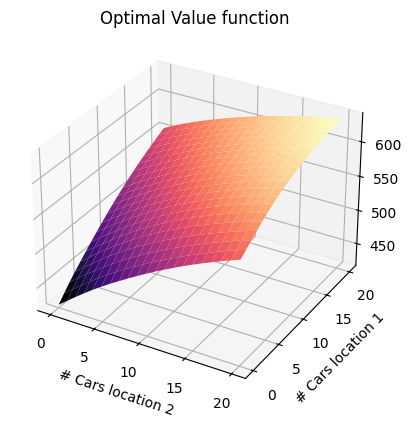

In [7]:
optimal_value_function, policies = algorithms.policy_iter_jack(jack, jack.state_space, jack.action_space, policy, threshold, gamma)
optimal_policy = policies[-1]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(0, 21, 1)
Y = np.arange(0, 21, 1)
X, Y = np.meshgrid(X, Y)
Z = optimal_value_function

surf = ax.plot_surface(X, Y, Z, cmap=cm.magma)
plt.xlabel("# Cars location 2")
plt.ylabel("# Cars location 1")
plt.title("Optimal Value function")
plt.show()

In [8]:
for state in jack.state_space:
    print(f"{state}: {optimal_policy[state]}")

(0, 0): 0.0
(0, 1): 0.0
(0, 2): 0.0
(0, 3): 0.0
(0, 4): 0.0
(0, 5): 0.0
(0, 6): 0.0
(0, 7): 0.0
(0, 8): -1.0
(0, 9): -1.0
(0, 10): -2.0
(0, 11): -2.0
(0, 12): -2.0
(0, 13): -3.0
(0, 14): -3.0
(0, 15): -3.0
(0, 16): -3.0
(0, 17): -3.0
(0, 18): -4.0
(0, 19): -4.0
(0, 20): -4.0
(1, 0): 0.0
(1, 1): 0.0
(1, 2): 0.0
(1, 3): 0.0
(1, 4): 0.0
(1, 5): 0.0
(1, 6): 0.0
(1, 7): 0.0
(1, 8): 0.0
(1, 9): -1.0
(1, 10): -1.0
(1, 11): -1.0
(1, 12): -2.0
(1, 13): -2.0
(1, 14): -2.0
(1, 15): -2.0
(1, 16): -2.0
(1, 17): -3.0
(1, 18): -3.0
(1, 19): -3.0
(1, 20): -3.0
(2, 0): 0.0
(2, 1): 0.0
(2, 2): 0.0
(2, 3): 0.0
(2, 4): 0.0
(2, 5): 0.0
(2, 6): 0.0
(2, 7): 0.0
(2, 8): 0.0
(2, 9): 0.0
(2, 10): 0.0
(2, 11): -1.0
(2, 12): -1.0
(2, 13): -1.0
(2, 14): -1.0
(2, 15): -1.0
(2, 16): -2.0
(2, 17): -2.0
(2, 18): -2.0
(2, 19): -2.0
(2, 20): -2.0
(3, 0): 0.0
(3, 1): 0.0
(3, 2): 0.0
(3, 3): 0.0
(3, 4): 0.0
(3, 5): 0.0
(3, 6): 0.0
(3, 7): 0.0
(3, 8): 0.0
(3, 9): 0.0
(3, 10): 0.0
(3, 11): 0.0
(3, 12): 0.0
(3, 13): 0.0
(3, 

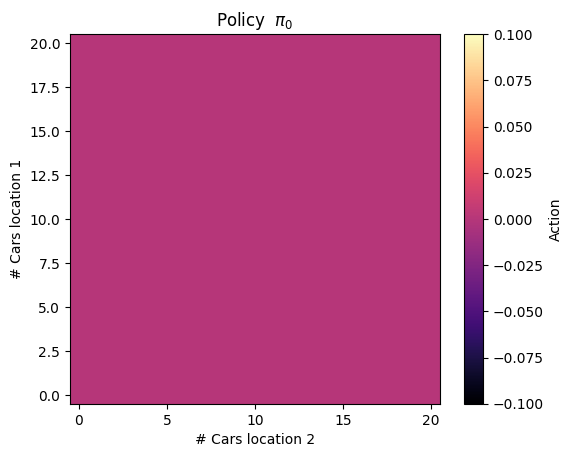

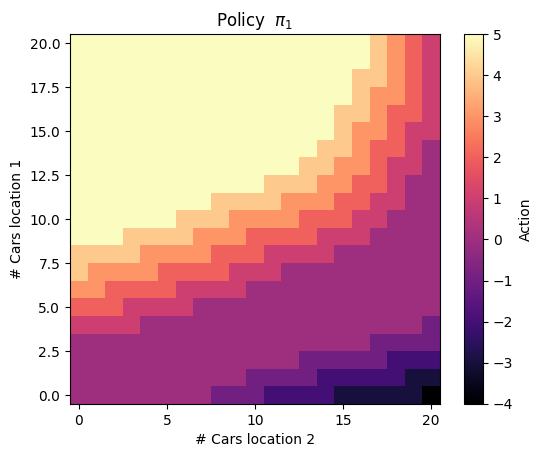

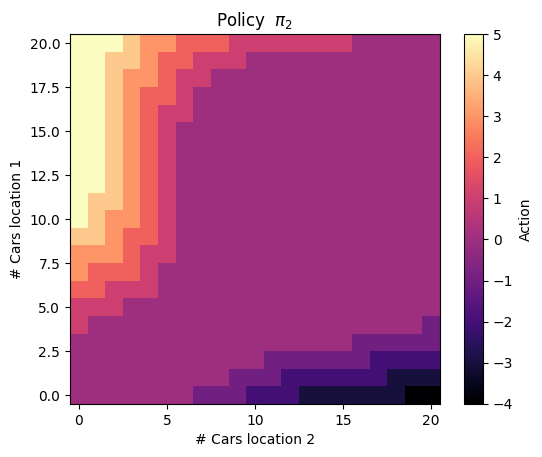

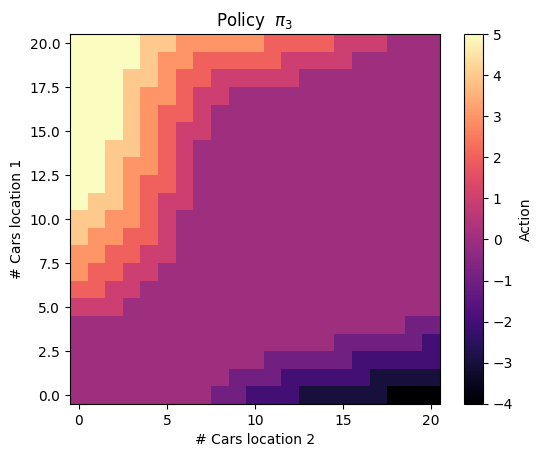

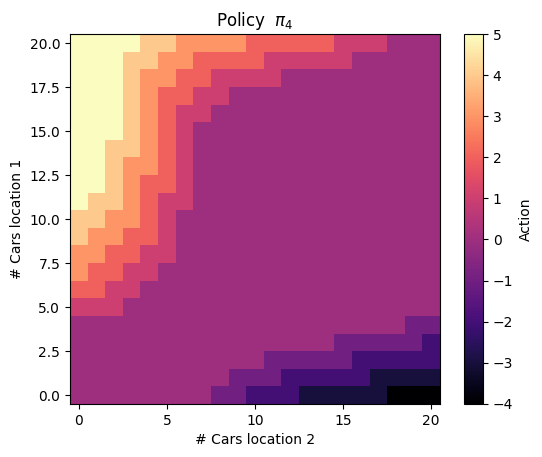

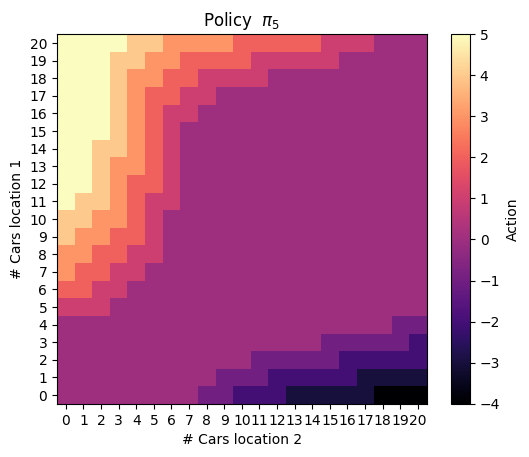

In [9]:
for i in range(len(policies)):
    fig, ax = plt.subplots()
    im = ax.imshow(policies[i], origin="lower", cmap=cm.magma)
    plt.title(f"Policy  $\pi_{i}$")
    plt.colorbar(im, label = "Action")
    plt.xlabel("# Cars location 2")
    plt.ylabel("# Cars location 1")

plt.xticks(range(21))
plt.yticks(range(21))

plt.show()

## Q6 (b) Modified Jack's Car Rental Problem

In [10]:
jack.modified = True
jack.precompute_transitions()

#### Written: Describe how you will change the dynamics function to reflect the following changes.
In the modified version, there are a couple things which had to be changed.
1. Since one of the Jack's employees is happy to transport one car free of cost from location A to location B, essentially we can move one car for free from A to B. So for actions [1, 5], the actual cost would be cost_to_move*(action-1)

2. For each of the locations, heavy overflow fee is imposed. Hence now after taking an action, we will have to check for the overflow condition and give a negative reward if one or both of the locations have cars > 10. 

Both of the changes that I mentioned have been implemented in the precompute_transitions function

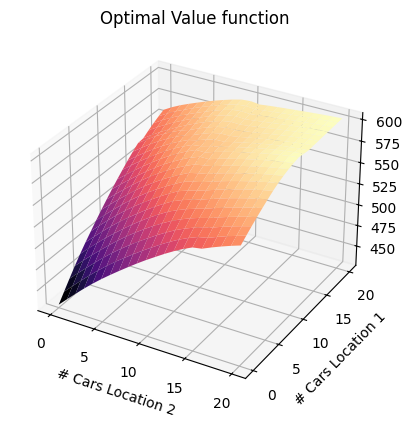

In [11]:
optimal_value_function, policies = algorithms.policy_iter_jack(jack, jack.state_space, jack.action_space, policy, threshold, gamma)
optimal_policy = policies[-1]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(0, 21, 1)
Y = np.arange(0, 21, 1)
X, Y = np.meshgrid(X, Y)
Z = optimal_value_function

surf = ax.plot_surface(X, Y, Z, cmap=cm.magma)
plt.xlabel("# Cars Location 2")
plt.ylabel("# Cars Location 1")
plt.title("Optimal Value function")
plt.show()

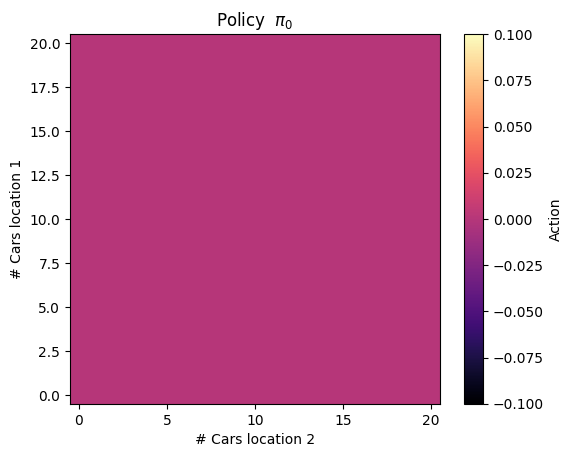

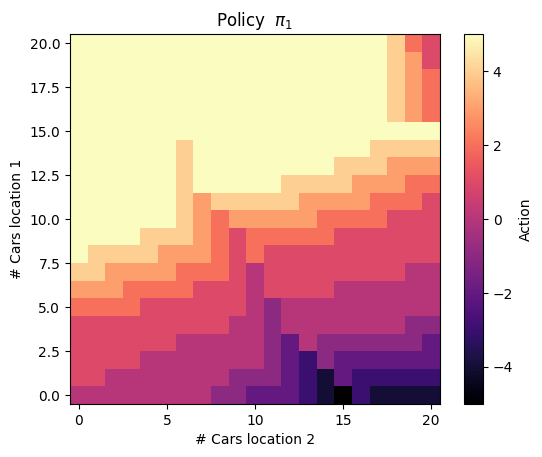

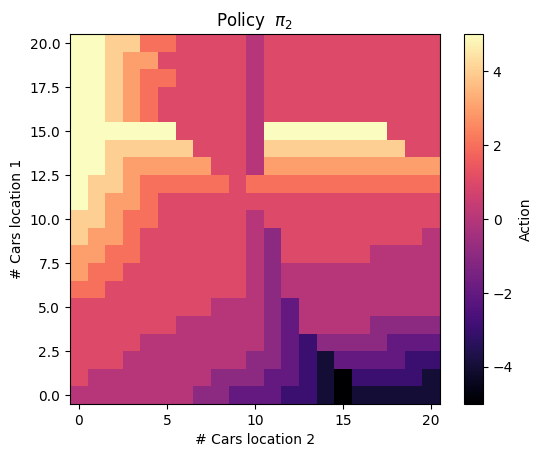

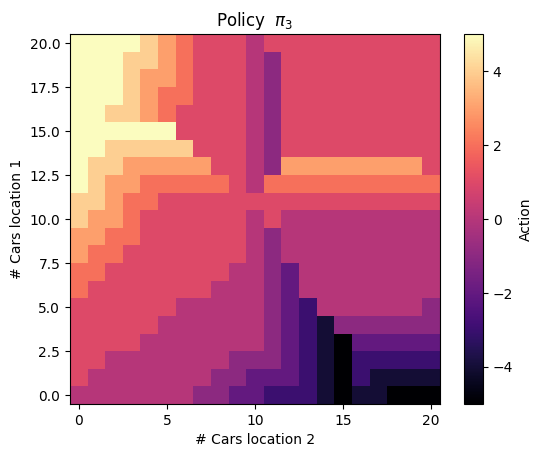

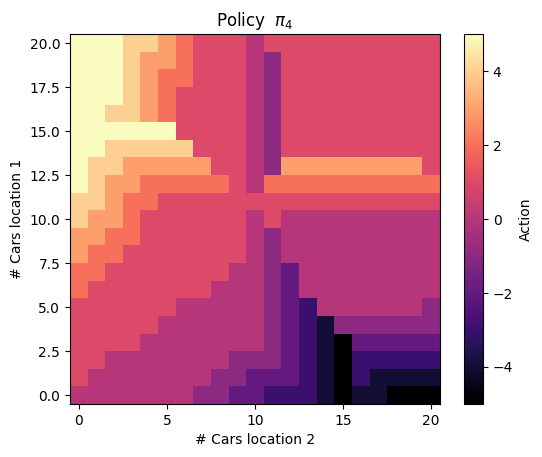

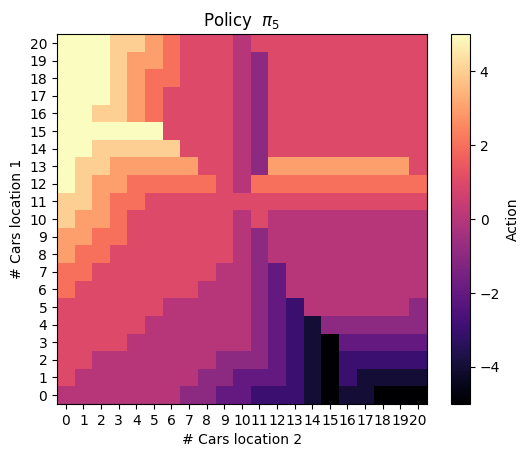

In [12]:
for i in range(len(policies)):
    fig, ax = plt.subplots()
    im = ax.imshow(policies[i], origin="lower", cmap=cm.magma)
    plt.title(f"Policy  $\pi_{i}$")
    plt.colorbar(im, label = "Action")
    plt.xlabel("# Cars location 2")
    plt.ylabel("# Cars location 1")

plt.xticks(range(21))
plt.yticks(range(21))

plt.show()

#### Written: How does your final policy differ from Q6(a)? Explain why the differences make sense.
In Q6(a), the policy was inclined to move cars from A to B roughly when cars at A>5, and from B to A when cars at B>8. This makes sense as the rate of renting at location B is higher than that of location A, hence having more cars at location B would help maximize the rewards. Also, the policy was inclined to minimize the number of cars to move, since it costs us money (negative reward). 

Whereas in the modified problem, I see that the policy is trying to avoid the overflow fees due to its high cost. It can be clearly seen in the policy that when the number of cars at a location are greater than 10, and if the number of cars at another location is less than 10, then it is highly likely that we shift the cars to avoid paying the overflow fees. It is an added bonus that we can transport one car for free from location A to location B. Hence the policy also tries to move one car from A to B even if there's just one car at location A, since the expected reward at B is higher.

These are some of the major changes that I observed in the two policies